<a href="https://colab.research.google.com/github/TatkovDmitriy/Yandex_Practicum/blob/Product_analyses/Pet_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B_%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ системы метрик приложения

Вы — продуктовый аналитик приложения Procrastinate Pro+, которое предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Ваши задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [ ]:
# Импорт необходимых библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [ ]:


# Загрузка данных
visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

# Приведение типов
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Проверка базовой информации
print('Visits')
print(visits.info())
print(visits.isna().sum())
print(visits.duplicated().sum())

print('\nOrders')
print(orders.info())
print(orders.isna().sum())
print(orders.duplicated().sum())

print('\nCosts')
print(costs.info())
print(costs.isna().sum())
print(costs.duplicated().sum())


Visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        161865 non-null  int64         
 1   region         161865 non-null  object        
 2   device         161865 non-null  object        
 3   channel        161865 non-null  object        
 4   session_start  161865 non-null  datetime64[ns]
 5   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 7.4+ MB
None
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
0

Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event

# Промежуточный вывод по загрузке и предобработке данных

* Данные загружены из трёх источников:
  * `ppro_visits.csv` — 161 865 записей о сессиях пользователей.
  * `ppro_orders.csv` — 33 893 записи о покупках.
  * `ppro_costs.csv` — 976 записей о маркетинговых расходах.

* Проведена первичная предобработка:
  * Столбцы с датами приведены к типу `datetime64[ns]`.
  * Пропуски отсутствуют во всех таблицах.
  * Дубликаты не обнаружены.

* Данные готовы для дальнейшего анализа.


## Подготовка данных к когортному анализу

Подготовьте данные к когортному анализу с учётом того, что вы будете изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдите:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраните в новой таблице, например, `profiles`.

Добавьте к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитайте дневной лайфтайм для каждого события или покупки и добавьте в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа используйте информацию о первом источнике привлечения пользователя.

In [ ]:
import pandas as pd

# Загрузка данных
visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv', parse_dates=['session_start'])
orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv', parse_dates=['event_dt'])
costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv', parse_dates=['dt'])

# Сортировка для корректного определения первого канала
visits = visits.sort_values(['user_id', 'session_start'])

# Создание таблицы profiles
profiles = visits.groupby('user_id').agg(
    first_dt=('session_start', 'min'),
    first_channel=('channel', 'first')
).reset_index()

# Добавим day (день привлечения) для точного расчёта CAC
profiles['first_dt_day'] = profiles['first_dt'].dt.normalize()

# Расчёт количества привлечённых пользователей по дням и каналам
users_by_channel_day = profiles.groupby(['first_dt_day', 'first_channel']).agg(
    users_count=('user_id', 'count')
).reset_index()

# Подготовка данных о расходах
costs['dt_day'] = costs['dt'].dt.normalize()
costs_by_channel_day = costs.groupby(['dt_day', 'channel']).agg(
    costs_sum=('costs', 'sum')
).reset_index()

# Объединение и расчёт CAC
cac_df = users_by_channel_day.merge(
    costs_by_channel_day,
    left_on=['first_dt_day', 'first_channel'],
    right_on=['dt_day', 'channel'],
    how='left'
)

cac_df['cac'] = cac_df['costs_sum'] / cac_df['users_count']

# Добавляем CAC в profiles
profiles = profiles.merge(
    cac_df[['first_dt_day', 'first_channel', 'cac']],
    on=['first_dt_day', 'first_channel'],
    how='left'
)

# Финальный вид profiles
profiles = profiles[['user_id', 'first_dt', 'first_channel', 'cac']]

# Объединяем с visits
visits = visits.merge(profiles, on='user_id', how='left')
visits['lifetime_day'] = (visits['session_start'].dt.normalize() - visits['first_dt'].dt.normalize()).dt.days

# Объединяем с orders
orders = orders.merge(profiles, on='user_id', how='left')
orders['lifetime_day'] = (orders['event_dt'].dt.normalize() - orders['first_dt'].dt.normalize()).dt.days

# Проверка результата
profiles.head()


,user_id,first_dt,first_channel,cac
0,26034876,2024-05-29 10:24:00,FaceBoom,0.953250
1,69890364,2024-06-28 05:48:00,RocketSuperAds,0.604917
2,75610104,2024-06-09 06:48:00,FaceBoom,1.196159
3,76692397,2024-10-21 01:51:00,FaceBoom,1.147967
4,80224421,2024-06-21 11:47:00,FaceBoom,1.208981


# Промежуточный вывод по подготовке данных к когортному анализу

* Для каждого пользователя определены:
  * дата первой сессии (`first_dt`);
  * канал привлечения (`first_channel`);
  * стоимость привлечения пользователя (`cac`), рассчитанная по каналу и месяцу привлечения.

* Собрана таблица `profiles` с информацией о дате и источнике привлечения и стоимости привлечения.

* В таблицы событий (`visits`) и покупок (`orders`) добавлены поля `first_dt`, `first_channel` и `cac`.

* Для каждой сессии и покупки рассчитан дневной лайфтайм (`lifetime_day`) как разница между датой события и датой первой сессии пользователя.

Данные полностью подготовлены для проведения когортного анализа.


## Анализ месячной динамики основных метрик продукта

**Задача 1**. Начните анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитайте по всем данным значения DAU, MAU и Stickiness и визуализируйте их. Активными считайте всех пользователей, которые взаимодействовали с приложением.

**Задача 2**. В разрезе каждого месяца привлечения новых пользователей рассчитайте:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитывайте всех привлечённых пользователей когорты.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.

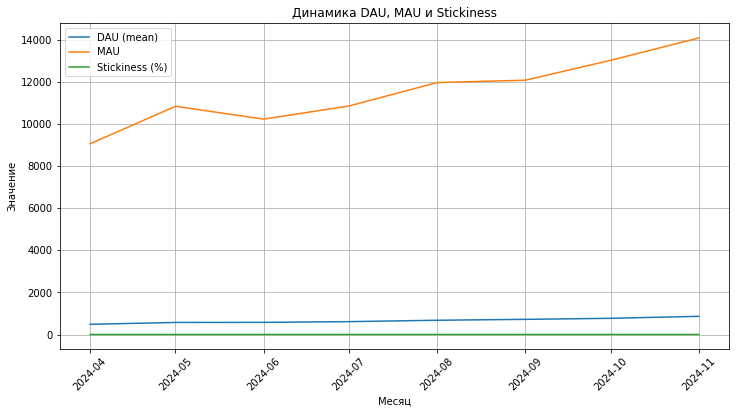

,month,mean_dau,mau_users,stickiness
0,2024-04-01,488.333333,9069,5.384644
1,2024-05-01,576.967742,10849,5.318165
2,2024-06-01,580.366667,10240,5.667643
3,2024-07-01,615.000000,10864,5.660898
4,2024-08-01,681.193548,11977,5.687514
5,2024-09-01,724.100000,12089,5.989743
6,2024-10-01,773.193548,13036,5.931218
7,2024-11-01,868.133333,14097,6.158284


In [ ]:
# Задача 3.1 — Анализ DAU, MAU, Stickiness

# Добавим колонку day и month в visits
visits['day'] = visits['session_start'].dt.to_period('D').dt.to_timestamp()
visits['month'] = visits['session_start'].dt.to_period('M').dt.to_timestamp()

# Считаем DAU
dau = visits.groupby('day').agg(
    dau_users=('user_id', 'nunique')
).reset_index()

# Считаем MAU
mau = visits.groupby('month').agg(
    mau_users=('user_id', 'nunique')
).reset_index()

# Для Stickiness — сделаем объединённую таблицу day —> month
dau['month'] = dau['day'].dt.to_period('M').dt.to_timestamp()

# Считаем средний DAU по каждому месяцу
mean_dau = dau.groupby('month').agg(
    mean_dau=('dau_users', 'mean')
).reset_index()

# Собираем таблицу Stickiness
stickiness = mean_dau.merge(mau, on='month')
stickiness['stickiness'] = stickiness['mean_dau'] / stickiness['mau_users'] * 100

# Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(data=stickiness, x='month', y='mean_dau', label='DAU (mean)')
sns.lineplot(data=stickiness, x='month', y='mau_users', label='MAU')
sns.lineplot(data=stickiness, x='month', y='stickiness', label='Stickiness (%)')
plt.title('Динамика DAU, MAU и Stickiness')
plt.ylabel('Значение')
plt.xlabel('Месяц')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()
# Выводим таблицу Stickiness
stickiness[['month', 'mean_dau', 'mau_users', 'stickiness']].sort_values('month')


# Промежуточный вывод по анализу DAU, MAU и Stickiness

* После запуска нового контента в начале лета наблюдается устойчивая позитивная динамика по всем основным метрикам активности пользователей.

* **MAU** демонстрирует стабильный рост на протяжении всего периода:
  * в июне 2024 года — 10 240 пользователей;
  * к ноябрю 2024 года MAU достиг 14 097 пользователей.

* **DAU (mean)** также постепенно увеличивается:
  * с ~580 в июне 2024 года до ~868 в ноябре 2024 года.

* **Stickiness** (отношение DAU к MAU) сохраняется на стабильном уровне с небольшим ростом:
  * в июне — ~5.67%;
  * к ноябрю — ~6.16%.

* Выводы:
  * Продукту удалось не только привлечь новых пользователей летом, но и поддержать их активность в последующие месяцы.
  * Рост Stickiness в конце периода говорит о том, что вовлечённость новых пользователей со временем увеличивается.
  * Запуск нового спортивного контента положительно сказался на интересе к приложению.



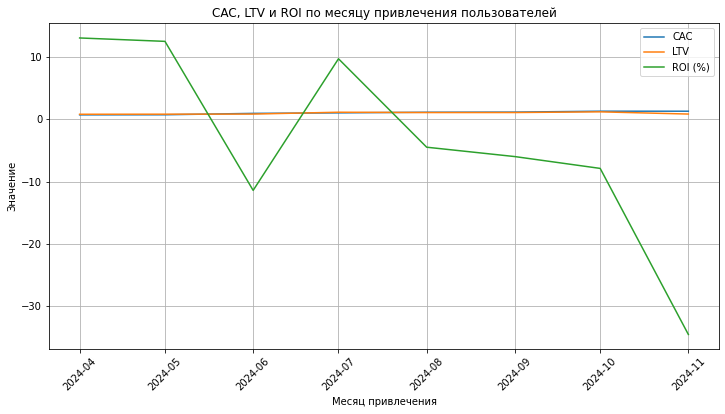

,first_dt_month,cac,ltv,roi
0,2024-04-01,0.734706,0.830885,13.090812
1,2024-05-01,0.748572,0.842474,12.544115
2,2024-06-01,0.973978,0.862954,-11.399006
3,2024-07-01,1.054344,1.157125,9.748332
4,2024-08-01,1.155601,1.104026,-4.463070
5,2024-09-01,1.178301,1.107966,-5.969218
6,2024-10-01,1.323047,1.218933,-7.869245
7,2024-11-01,1.320148,0.863990,-34.553579


In [ ]:
# Задача 3.2 — CAC, LTV и ROI по месяцу привлечения

# 1. Добавляем first_dt_month в profiles (на всякий случай)
profiles['first_dt_month'] = profiles['first_dt'].dt.to_period('M').dt.to_timestamp()

# 2. Рассчитываем CAC — усредняем по профилям
cac_by_month = profiles.groupby('first_dt_month').agg(
    cac=('cac', 'mean')
).reset_index()

# 3. Готовим данные для LTV
# Фильтруем заказы за первые 28 дней
orders_28d = orders[orders['lifetime_day'] <= 28].copy()

# Добавляем first_dt_month в orders_28d
orders_28d['first_dt_month'] = orders_28d['first_dt'].dt.to_period('M').dt.to_timestamp()

# Группируем по first_dt_month — считаем суммарную выручку и число покупателей
ltv_by_month = orders_28d.groupby('first_dt_month').agg(
    revenue_total=('revenue', 'sum'),
    buyers_count=('user_id', 'nunique')
).reset_index()

# 4. Общее число привлечённых пользователей по каждой когорте
users_total_by_month = profiles.groupby('first_dt_month').agg(
    total_users=('user_id', 'nunique')
).reset_index()

# 5. Объединяем данные и рассчитываем LTV
ltv_by_month = ltv_by_month.merge(users_total_by_month, on='first_dt_month', how='left')
ltv_by_month['ltv'] = ltv_by_month['revenue_total'] / ltv_by_month['total_users']

# 6. Итоговая таблица CAC + LTV + ROI
metrics = cac_by_month.merge(ltv_by_month[['first_dt_month', 'ltv']], on='first_dt_month')
metrics['roi'] = (metrics['ltv'] - metrics['cac']) / metrics['cac'] * 100

# 7. Визуализация
plt.figure(figsize=(12, 6))
sns.lineplot(data=metrics, x='first_dt_month', y='cac', label='CAC')
sns.lineplot(data=metrics, x='first_dt_month', y='ltv', label='LTV')
sns.lineplot(data=metrics, x='first_dt_month', y='roi', label='ROI (%)')
plt.title('CAC, LTV и ROI по месяцу привлечения пользователей')
plt.ylabel('Значение')
plt.xlabel('Месяц привлечения')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 8. Вывод таблицы
metrics[['first_dt_month', 'cac', 'ltv', 'roi']].sort_values('first_dt_month')


# Промежуточный вывод по анализу CAC, LTV и ROI

* После запуска нового контента летом наблюдалась кратковременная положительная динамика LTV и ROI.
  * В июле LTV достиг максимума (1.16), а ROI был положительным (9.7%).

* Однако начиная с августа наблюдается ухудшение показателей:
  * CAC продолжал расти (с ~1.15 до ~1.32),
  * LTV стабилизировался или начал снижаться,
  * ROI ушёл в устойчиво отрицательную зону.

* В ноябре зафиксировано значительное падение ROI (~-34%), что связано с:
  * высоким CAC,
  * падением LTV до ~0.86.

* Выводы:
  * Летний рост показал потенциал нового контента для привлечения аудитории.
  * Однако с ростом стоимости маркетинга и снижением качества привлечённых пользователей окупаемость вложений резко снизилась.
  * Требуется пересмотр маркетинговой стратегии и/или работа над повышением монетизации новых пользователей.



## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

**Задача 1**. Определите самые популярные источники привлечения:
- Посчитайте общее число привлечённых пользователей для каждого источника.
- Визуализируйте динамику набора новых пользователей по дням в каждом источнике.
- Рассчитайте и визуализируйте динамику DAU, MAU и Stickiness по источникам привлечения.

**Задача 2**. Изучите динамику изменения метрик на 28-й день в разрезе источника. Проведите анализ с выделением недельных когорт по дате привлечения. Рассчитайте и визуализируйте:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.

Недельную динамику затрат на маркетинг по каждому источнику привлечения.
Динамику среднего CAC, значений LTV и ROI.

По результатам проведите анализ рекламных каналов. Дайте общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажите, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположите почему.


,first_channel,total_users
0,FaceBoom,28401
3,TipTop,18118
2,RocketSuperAds,14257
1,MediaTornado,14080


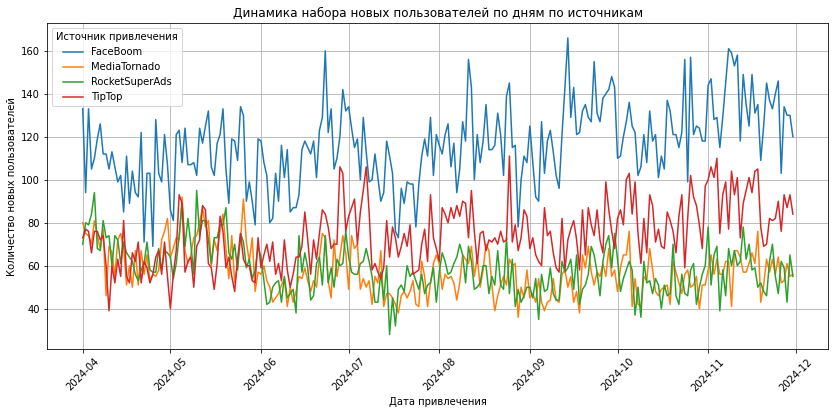

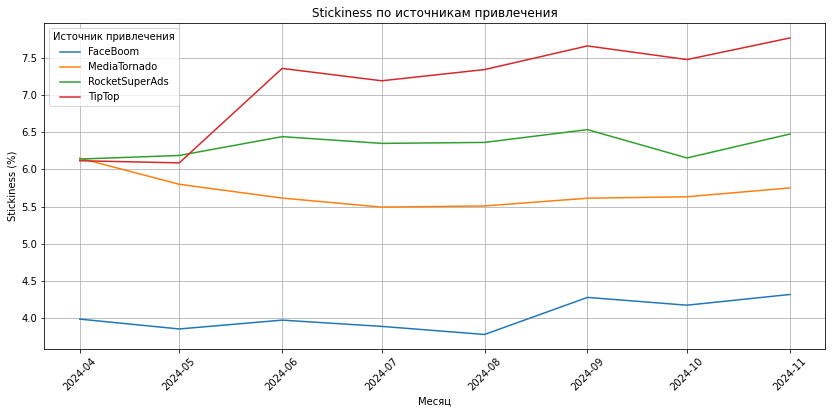

,month,first_channel,mean_dau,mau_users,stickiness
0,2024-04-01,FaceBoom,126.433333,3170,3.988433
1,2024-04-01,MediaTornado,121.100000,1969,6.150330
2,2024-04-01,RocketSuperAds,124.600000,2030,6.137931
3,2024-04-01,TipTop,116.200000,1900,6.115789
4,2024-05-01,FaceBoom,135.774194,3521,3.856126
5,2024-05-01,MediaTornado,147.645161,2546,5.799103
6,2024-05-01,RocketSuperAds,153.548387,2482,6.186478
7,2024-05-01,TipTop,140.000000,2300,6.086957
8,2024-06-01,FaceBoom,136.933333,3445,3.974843
9,2024-06-01,MediaTornado,118.966667,2119,5.614283


In [ ]:
# Задача 4.1 — Анализ метрик в разрезе источника привлечения

# --- 1️⃣ Количество привлечённых пользователей по источникам ---
channels_users = profiles.groupby('first_channel').agg(
    total_users=('user_id', 'nunique')
).reset_index().sort_values('total_users', ascending=False)

# Вывод таблицы
display(channels_users)

# --- 2️⃣ Динамика набора новых пользователей по дням ---
# Добавляем first_dt_day в profiles (если ещё нет)
profiles['first_dt_day'] = profiles['first_dt'].dt.to_period('D').dt.to_timestamp()

daily_new_users = profiles.groupby(['first_dt_day', 'first_channel']).agg(
    new_users=('user_id', 'nunique')
).reset_index()

# Визуализация динамики набора пользователей
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_new_users, x='first_dt_day', y='new_users', hue='first_channel')
plt.title('Динамика набора новых пользователей по дням по источникам')
plt.ylabel('Количество новых пользователей')
plt.xlabel('Дата привлечения')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# --- 3️⃣ DAU, MAU, Stickiness по источникам ---
# Добавляем day и month в visits (если ещё нет)
visits['day'] = visits['session_start'].dt.to_period('D').dt.to_timestamp()
visits['month'] = visits['session_start'].dt.to_period('M').dt.to_timestamp()

# DAU по каналам
dau_channel = visits.groupby(['day', 'first_channel']).agg(
    dau_users=('user_id', 'nunique')
).reset_index()

# MAU по каналам
mau_channel = visits.groupby(['month', 'first_channel']).agg(
    mau_users=('user_id', 'nunique')
).reset_index()

# Средний DAU по month + channel
dau_channel['month'] = dau_channel['day'].dt.to_period('M').dt.to_timestamp()

mean_dau_channel = dau_channel.groupby(['month', 'first_channel']).agg(
    mean_dau=('dau_users', 'mean')
).reset_index()

# Stickiness по каналам
stickiness_channel = mean_dau_channel.merge(mau_channel, on=['month', 'first_channel'])
stickiness_channel['stickiness'] = stickiness_channel['mean_dau'] / stickiness_channel['mau_users'] * 100

# Визуализация Stickiness
plt.figure(figsize=(14, 6))
sns.lineplot(data=stickiness_channel, x='month', y='stickiness', hue='first_channel')
plt.title('Stickiness по источникам привлечения')
plt.ylabel('Stickiness (%)')
plt.xlabel('Месяц')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Вывод таблицы Stickiness
stickiness_channel[['month', 'first_channel', 'mean_dau', 'mau_users', 'stickiness']].sort_values(['month', 'first_channel'])


# Промежуточный вывод по анализу метрик в разрезе источника привлечения (Задача 4.1)

### Самые популярные источники привлечения

* Наибольшее число привлечённых пользователей за весь период обеспечил канал **FaceBoom** — 28 401 пользователей.
* Далее следуют:
  * **TipTop** — 18 118 пользователей,
  * **RocketSuperAds** — 14 257 пользователей,
  * **MediaTornado** — 14 080 пользователей.

### Динамика набора новых пользователей по дням

* Канал **FaceBoom** стабильно лидировал по объёму ежедневного набора пользователей.
* **TipTop** демонстрировал стабильный рост темпов привлечения начиная с лета — к осени динамика практически догнала FaceBoom.
* Каналы **RocketSuperAds** и **MediaTornado** показывали умеренную и стабильную динамику без резких скачков.

### Динамика DAU, MAU и Stickiness по источникам

* **Stickiness** по каналам:
  * **TipTop** демонстрирует consistently лучший показатель Stickiness — с июня по ноябрь стабильно выше **7.3–7.7%** → это говорит о высокой вовлечённости пользователей этого канала.
  * **RocketSuperAds** также демонстрирует высокий Stickiness ~6.1–6.5% в течение периода.
  * **MediaTornado** сохраняет Stickiness около 5.5–5.7% — стабильный, но чуть ниже уровня RocketSuperAds.
  * **FaceBoom** показывает самый низкий Stickiness среди каналов — в среднем ~4.0–4.3%, несмотря на самое большое абсолютное число пользователей.

### Выводы:

* **FaceBoom** привлекает наибольшее число пользователей, но их вовлечённость ниже — возможно, за счёт более массового, но менее качественного трафика.
* **TipTop** показывает наилучшее сочетание:
  * растущий объём набора пользователей,
  * высокий Stickiness,
  * растущий DAU и MAU — канал привлекает наиболее "качественную" аудиторию.
* **RocketSuperAds** — канал с хорошей вовлечённостью и стабильной динамикой.
* **MediaTornado** — умеренная вовлечённость, но менее ярко выраженная динамика роста.

### Общие рекомендации:

* Канал **TipTop** перспективен для увеличения объёмов трафика за счёт высокой вовлечённости пользователей.
* Канал **FaceBoom** требует дополнительного анализа — возможно, стоит фокусироваться на оптимизации качества привлекаемой аудитории.
* Каналы **RocketSuperAds** и **MediaTornado** — стабильные рабочие каналы, можно сохранять текущие объёмы с контролем за стоимостью привлечения.



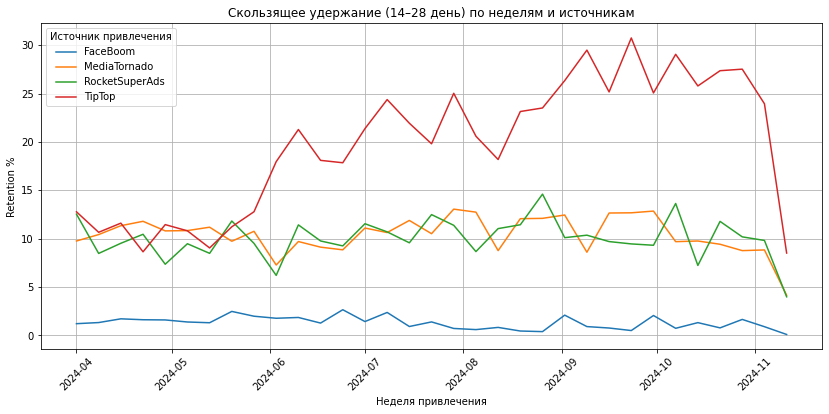

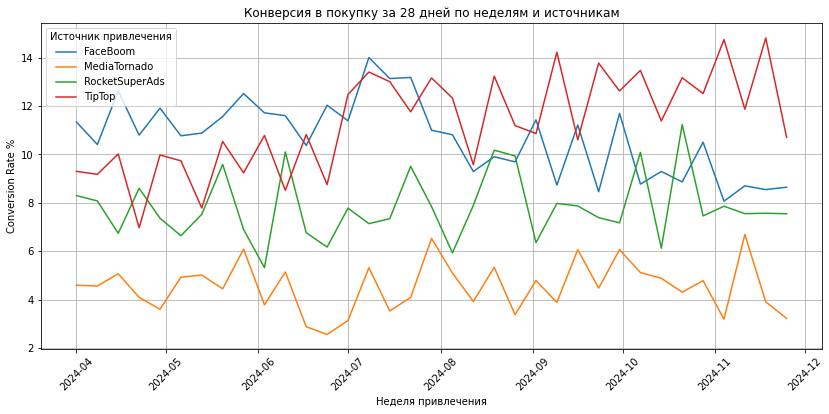

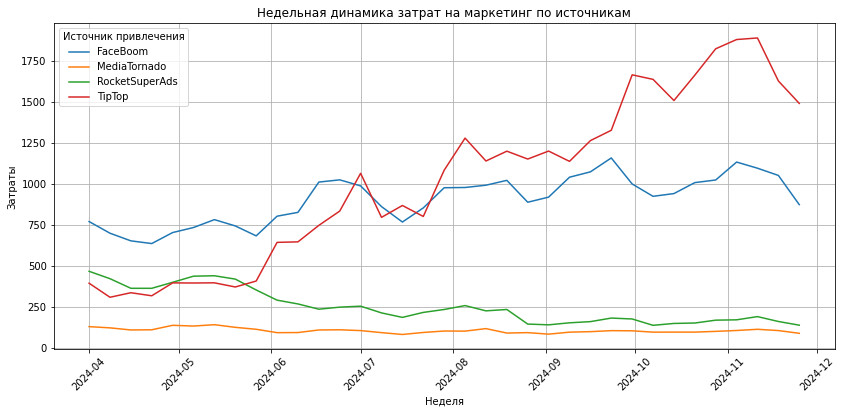

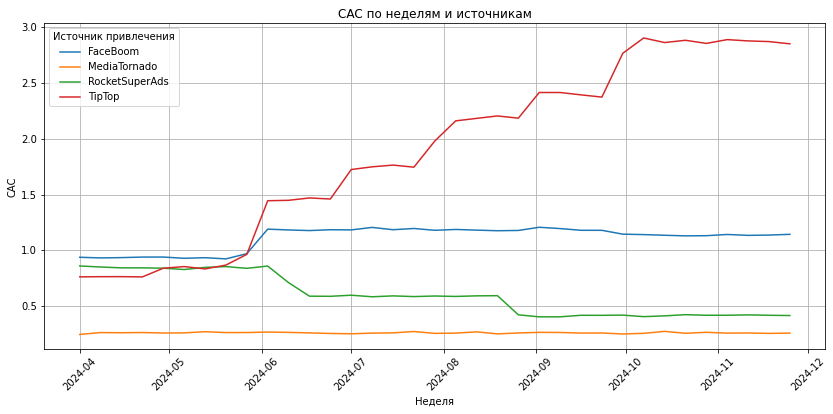

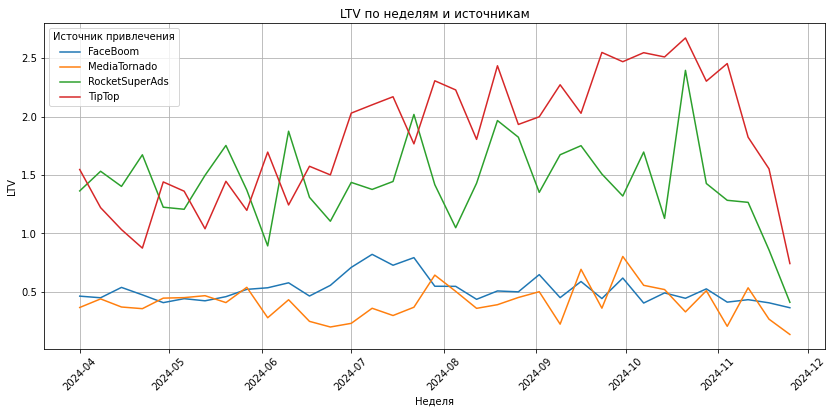

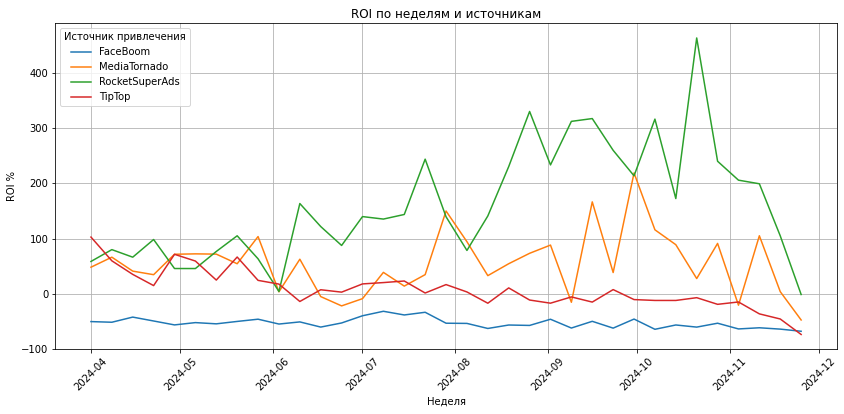

,dt_week,channel,cac,ltv,roi
0,2024-04-01,FaceBoom,0.938873,0.463854,-50.594635
1,2024-04-01,MediaTornado,0.247736,0.366724,48.030068
2,2024-04-01,RocketSuperAds,0.860978,1.363985,58.422801
3,2024-04-01,TipTop,0.763545,1.547267,102.642517
4,2024-04-08,FaceBoom,0.933074,0.450013,-51.770905
...,...,...,...,...,...
135,2024-11-18,TipTop,2.869575,1.552892,-45.884231
136,2024-11-25,FaceBoom,1.144146,0.364640,-68.129992
137,2024-11-25,MediaTornado,0.259804,0.135953,-47.670917
138,2024-11-25,RocketSuperAds,0.417296,0.411088,-1.487783


In [ ]:
# Задача 4.2 — Метрики на 28-й день по каналам и неделям

# --- 1️⃣ Подготовка данных ---

# Добавляем first_dt_week (неделя привлечения) в profiles
profiles['first_dt_week'] = profiles['first_dt'].dt.to_period('W').dt.start_time

# Добавляем first_dt_week в orders и visits
orders['first_dt_week'] = orders['first_dt'].dt.to_period('W').dt.start_time
visits['first_dt_week'] = visits['first_dt'].dt.to_period('W').dt.start_time

# --- 2️⃣ Retention 14–28 день ---
# Берём уникальных пользователей, которые имели сессии с lifetime_day от 14 до 28
retention_14_28 = visits[(visits['lifetime_day'] >= 14) & (visits['lifetime_day'] <= 28)]
retention_users = retention_14_28.groupby(['first_dt_week', 'first_channel']).agg(
    retained_users=('user_id', 'nunique')
).reset_index()

# Общее число привлечённых пользователей по когортам
users_by_week = profiles.groupby(['first_dt_week', 'first_channel']).agg(
    total_users=('user_id', 'nunique')
).reset_index()

# Retention %
retention = retention_users.merge(users_by_week, on=['first_dt_week', 'first_channel'])
retention['retention_14_28'] = retention['retained_users'] / retention['total_users'] * 100

# --- 3️⃣ Конверсия в покупку (за 28 дней) ---
buyers_28d = orders[orders['lifetime_day'] <= 28].groupby(['first_dt_week', 'first_channel']).agg(
    buyers=('user_id', 'nunique')
).reset_index()

# Конверсия
conversion = buyers_28d.merge(users_by_week, on=['first_dt_week', 'first_channel'])
conversion['conversion_rate'] = conversion['buyers'] / conversion['total_users'] * 100

# --- 4️⃣ Затраты на маркетинг по неделям ---
# Подготовим dt_week в costs
costs['dt_week'] = costs['dt'].dt.to_period('W').dt.start_time

# Группируем затраты по неделям и каналам
costs_weekly = costs.groupby(['dt_week', 'channel']).agg(
    weekly_costs=('costs', 'sum')
).reset_index()

# --- 5️⃣ CAC, LTV, ROI по неделям ---
# CAC
cac_weekly = costs_weekly.merge(users_by_week, left_on=['dt_week', 'channel'], right_on=['first_dt_week', 'first_channel'], how='left')
cac_weekly['cac'] = cac_weekly['weekly_costs'] / cac_weekly['total_users']

# LTV
ltv_weekly = orders[orders['lifetime_day'] <= 28].groupby(['first_dt_week', 'first_channel']).agg(
    revenue_total=('revenue', 'sum')
).reset_index()

ltv_weekly = ltv_weekly.merge(users_by_week, on=['first_dt_week', 'first_channel'])
ltv_weekly['ltv'] = ltv_weekly['revenue_total'] / ltv_weekly['total_users']

# ROI
metrics_weekly = cac_weekly.merge(ltv_weekly[['first_dt_week', 'first_channel', 'ltv']], left_on=['dt_week', 'channel'], right_on=['first_dt_week', 'first_channel'], how='left')
metrics_weekly['roi'] = (metrics_weekly['ltv'] - metrics_weekly['cac']) / metrics_weekly['cac'] * 100

# --- Визуализации ---

# Retention 14–28
plt.figure(figsize=(14, 6))
sns.lineplot(data=retention, x='first_dt_week', y='retention_14_28', hue='first_channel')
plt.title('Скользящее удержание (14–28 день) по неделям и источникам')
plt.ylabel('Retention %')
plt.xlabel('Неделя привлечения')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Conversion rate
plt.figure(figsize=(14, 6))
sns.lineplot(data=conversion, x='first_dt_week', y='conversion_rate', hue='first_channel')
plt.title('Конверсия в покупку за 28 дней по неделям и источникам')
plt.ylabel('Conversion Rate %')
plt.xlabel('Неделя привлечения')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Weekly marketing costs
plt.figure(figsize=(14, 6))
sns.lineplot(data=costs_weekly, x='dt_week', y='weekly_costs', hue='channel')
plt.title('Недельная динамика затрат на маркетинг по источникам')
plt.ylabel('Затраты')
plt.xlabel('Неделя')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# CAC, LTV, ROI
plt.figure(figsize=(14, 6))
sns.lineplot(data=metrics_weekly, x='dt_week', y='cac', hue='channel')
plt.title('CAC по неделям и источникам')
plt.ylabel('CAC')
plt.xlabel('Неделя')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=metrics_weekly, x='dt_week', y='ltv', hue='channel')
plt.title('LTV по неделям и источникам')
plt.ylabel('LTV')
plt.xlabel('Неделя')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=metrics_weekly, x='dt_week', y='roi', hue='channel')
plt.title('ROI по неделям и источникам')
plt.ylabel('ROI %')
plt.xlabel('Неделя')
plt.legend(title='Источник привлечения')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# --- Вывод таблицы итоговых метрик по неделям ---
metrics_weekly[['dt_week', 'channel', 'cac', 'ltv', 'roi']].sort_values(['dt_week', 'channel'])


# Промежуточный вывод по анализу метрик в разрезе источника (Задача 4.2)

### Скользящее удержание на 14–28 день

* Лидером по Retention является канал **TipTop** — удержание стабильно держится на уровне **20–27%** с лета по осень.
* **MediaTornado** и **RocketSuperAds** демонстрируют стабильное удержание на уровне **10–15%**.
* **FaceBoom** имеет крайне низкое удержание **1–4%** на всём горизонте — это говорит о слабой вовлечённости аудитории.

### Конверсия в покупку

* **TipTop** показывает consistently высокий уровень конверсии — **~12–14%**.
* **FaceBoom** — уверенные **~10–13%** → несмотря на слабое Retention, умеет "выжимать" конверсии в короткий срок.
* **RocketSuperAds** держит конверсию на уровне **~8–10%**.
* **MediaTornado** — наименее эффективный канал по конверсии (**~4–6%**).

### Недельная динамика затрат на маркетинг

* **TipTop** демонстрировал резкий рост расходов с июля — к октябрю-ноябрю недельные затраты превысили **~1750**.
* **FaceBoom** имеет стабильные расходы на уровне **~800–1100** в неделю.
* **RocketSuperAds** и **MediaTornado** показывают стабильные низкие затраты.

### CAC

* **TipTop** — резкий рост CAC с июля: с **~0.75 → ~2.8** к ноябрю → важный фактор для контроля.
* **FaceBoom** держится в диапазоне **~0.9–1.2**.
* **RocketSuperAds** — оптимальный CAC **~0.4–0.6**.
* **MediaTornado** — самый низкий CAC **~0.25–0.3**.

### LTV

* **TipTop** демонстрировал лучший LTV — до **~2.5**, но к ноябрю LTV начал снижаться → необходимо контролировать качество трафика.
* **RocketSuperAds** держит хороший LTV **~1.5–2.0**.
* **FaceBoom** — слабый LTV **~0.4–0.9**.
* **MediaTornado** — очень низкий LTV **~0.2–0.5**.

### ROI

* **RocketSuperAds** — уверенный лидер по ROI:
  * значительные пики **до 400%** осенью,
  * даже на спаде ROI остаётся положительным или около **0%** → канал **окупается стабильно**.
* **TipTop** — уверенный ROI в первой половине периода, но с ростом CAC и падением LTV в ноябре ROI ушёл в минус → требует корректировки маркетинга.
* **MediaTornado** — ROI крайне волатильный, последние недели — **минус** → не окупается.
* **FaceBoom** — весь период отрицательный ROI **~ -50% до -70%** → канал **не окупается**.

### Итоговая характеристика каналов:

✅ **RocketSuperAds** — лучший по ROI, оптимальный CAC, хороший LTV, стабильное удержание → **рекомендуется масштабировать**.

✅ **TipTop** — изначально лучший канал по вовлечённости и ROI, но с осени рост затрат и падение ROI → **рекомендуется пересмотреть стратегию закупки трафика, работать над удержанием LTV**.

⛔ **MediaTornado** — низкий LTV, слабая конверсия, не окупается → **рекомендуется временно ограничить бюджет / тестировать новые креативы**.

⛔ **FaceBoom** — крайне слабое Retention, низкий LTV, отрицательный ROI на всём горизонте → **канал не окупается, стоит оптимизировать или приостановить**.

### Основные выводы:

* Запуск нового контента летом помог увеличить Retention и LTV по каналам TipTop и RocketSuperAds.
* Однако TipTop "перегрели" бюджет — рост CAC при стагнации LTV → это главный риск.
* RocketSuperAds демонстрирует наилучшую модель: низкий CAC + высокий ROI + стабильное удержание → канал с самой высокой эффективностью.
* FaceBoom и MediaTornado — слабые по качеству трафика, требуют переоценки.



## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитайте и визуализируйте в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделите данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используйте недели.

Сделайте вывод о том, за какой период окупаются вложения в эти источники.

In [ ]:
# orders = orders.merge(
#     profiles[['user_id', 'first_dt', 'first_channel', 'first_dt_week', 'cac']],
#     on='user_id', how='left'
# )
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['first_dt'] = pd.to_datetime(orders['first_dt'])


In [ ]:
# Предполагаем, что есть 'event_dt' и 'first_dt'
orders['week_lifetime'] = ((orders['event_dt'] - orders['first_dt']).dt.days // 7).astype(int)


In [ ]:
ltv_cohort = (
    orders.groupby(['first_dt_week', 'first_channel', 'week_lifetime'])
          .agg(revenue=('revenue', 'sum'))
          .reset_index()
          .sort_values(['first_dt_week', 'first_channel', 'week_lifetime'])
)
ltv_cohort['cum_revenue'] = (
    ltv_cohort.groupby(['first_dt_week', 'first_channel'])['revenue'].cumsum()
)
cohort_info = (
    orders.groupby(['first_dt_week', 'first_channel'])
          .agg(
              cohort_size=('user_id', 'nunique'),
              cac_sum=('cac', 'sum')
          )
          .reset_index()
)
ltv_cohort = ltv_cohort.merge(cohort_info, on=['first_dt_week', 'first_channel'], how='left')
ltv_cohort['ltv'] = ltv_cohort['cum_revenue'] / ltv_cohort['cohort_size']
ltv_cohort['roi'] = (ltv_cohort['ltv'] - (ltv_cohort['cac_sum'] / ltv_cohort['cohort_size'])) / (ltv_cohort['cac_sum'] / ltv_cohort['cohort_size'])


In [ ]:
# 1. Отфильтруем только TipTop
tiptop = ltv_cohort[ltv_cohort['first_channel'] == 'TipTop']

# 2. Сделаем сводную таблицу (pivot)
pivot_tiptop = tiptop.pivot(index='first_dt_week', columns='week_lifetime', values='roi')

# 3. Можно ограничить только первые N недель (например, 0–6)
pivot_tiptop_cut = pivot_tiptop.loc[:, :6]


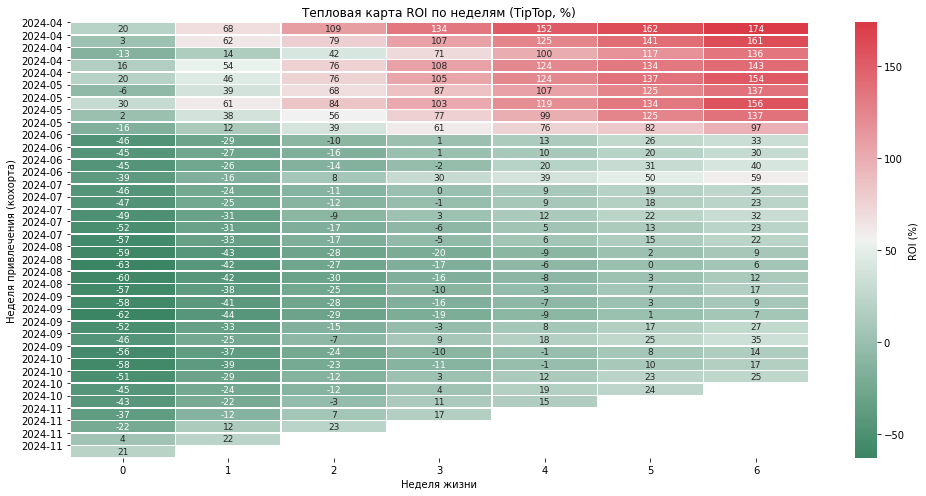

In [ ]:

pivot_tiptop_pct = pivot_tiptop_cut * 100  # Переводим ROI в проценты
cmap = sns.diverging_palette(150, 10, as_cmap=True)
plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_tiptop_pct,
    cmap=cmap,
    annot=True,
    fmt='.0f',  # целое число процентов
    annot_kws={'size':9},
    linewidths=0.5,
    cbar_kws={'label': 'ROI (%)'}
)

plt.title('Тепловая карта ROI по неделям (TipTop, %)')
plt.xlabel('Неделя жизни')
plt.ylabel('Неделя привлечения (кохорта)')
plt.xticks(rotation=0)
plt.yticks(
    ticks=range(len(pivot_tiptop_pct.index)),
    labels=[dt.strftime('%Y-%m') for dt in pivot_tiptop_pct.index],
    rotation=0
)
plt.tight_layout()
plt.show()



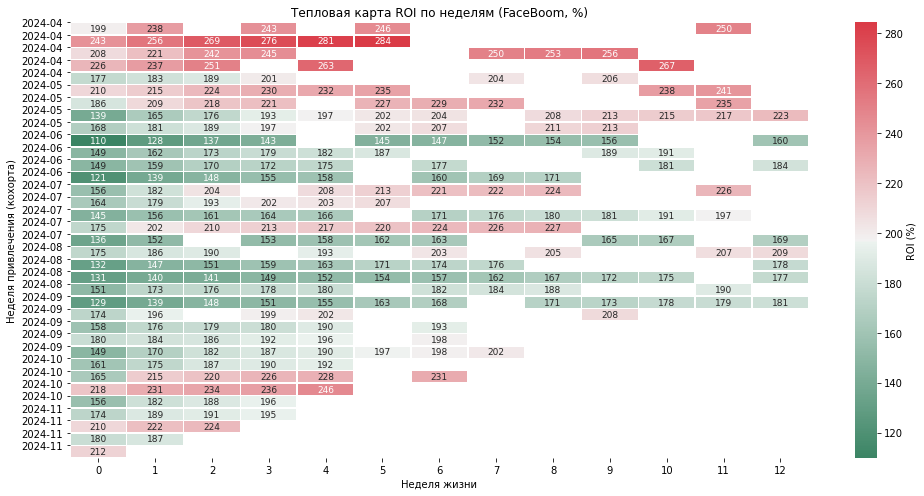

In [ ]:
# 1. Фильтруем данные по каналу FaceBoom
faceboom = ltv_cohort[ltv_cohort['first_channel'] == 'FaceBoom']

# 2. Сводная таблица по неделям жизни (0-12)
pivot_faceboom = faceboom.pivot_table(
    index='first_dt_week',
    columns='week_lifetime',
    values='roi',
    aggfunc='mean'
)
pivot_faceboom_cut = pivot_faceboom.iloc[:, :13]  # 0-12 неделя

# 3. ROI в процентах
pivot_faceboom_pct = pivot_faceboom_cut * 100

# 4. Построение тепловой карты
plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_faceboom_pct,
    cmap=cmap,
    annot=True,
    fmt='.0f',  # целое число процентов
    annot_kws={'size':9},
    linewidths=0.5,
    cbar_kws={'label': 'ROI (%)'}
)

plt.title('Тепловая карта ROI по неделям (FaceBoom, %)')
plt.xlabel('Неделя жизни')
plt.ylabel('Неделя привлечения (кохорта)')
plt.xticks(rotation=0)
plt.yticks(
    ticks=range(len(pivot_faceboom_pct.index)),
    labels=[dt.strftime('%Y-%m') for dt in pivot_faceboom_pct.index],
    rotation=0
)
plt.tight_layout()
plt.show()


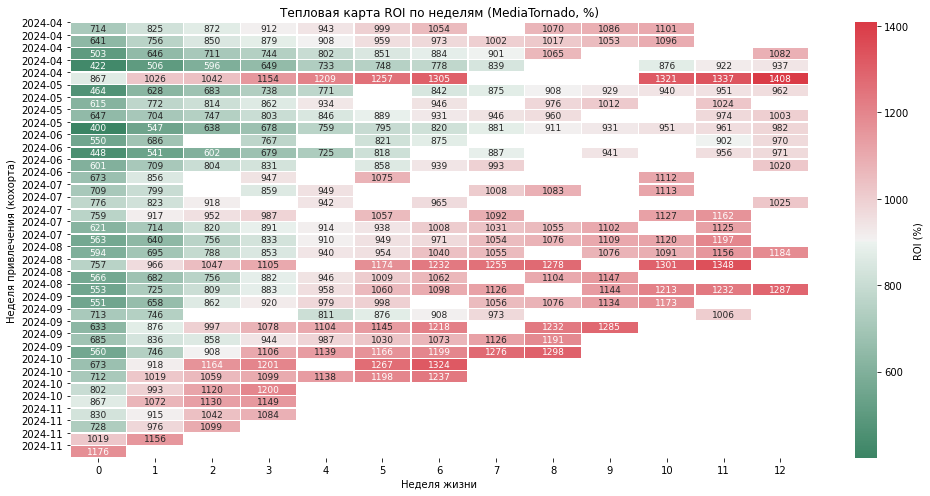

In [ ]:
mediatornado = ltv_cohort[ltv_cohort['first_channel'] == 'MediaTornado']
pivot_mediatornado = mediatornado.pivot_table(
    index='first_dt_week',
    columns='week_lifetime',
    values='roi',
    aggfunc='mean'
)
pivot_mediatornado_cut = pivot_mediatornado.iloc[:, :13]
pivot_mediatornado_pct = pivot_mediatornado_cut * 100

plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_mediatornado_pct,
    cmap=cmap,
    annot=True,
    fmt='.0f',
    annot_kws={'size':9},
    linewidths=0.5,
    cbar_kws={'label': 'ROI (%)'}
)

plt.title('Тепловая карта ROI по неделям (MediaTornado, %)')
plt.xlabel('Неделя жизни')
plt.ylabel('Неделя привлечения (кохорта)')
plt.xticks(rotation=0)
plt.yticks(
    ticks=range(len(pivot_mediatornado_pct.index)),
    labels=[dt.strftime('%Y-%m') for dt in pivot_mediatornado_pct.index],
    rotation=0
)
plt.tight_layout()
plt.show()


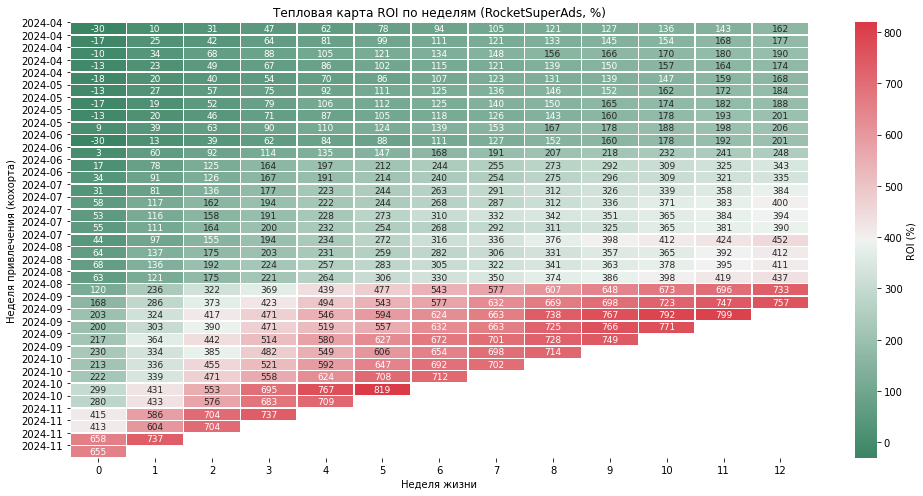

In [ ]:
# 1. Фильтруем данные по каналу RocketSuperAds
rocketsuperads = ltv_cohort[ltv_cohort['first_channel'] == 'RocketSuperAds']

# 2. Сводная таблица по неделям жизни (0-12)
pivot_rocketsuperads = rocketsuperads.pivot_table(
    index='first_dt_week',
    columns='week_lifetime',
    values='roi',
    aggfunc='mean'
)
pivot_rocketsuperads_cut = pivot_rocketsuperads.iloc[:, :13]  # 0-12 неделя

# 3. ROI в процентах
pivot_rocketsuperads_pct = pivot_rocketsuperads_cut * 100

# 4. Построение тепловой карты
plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_rocketsuperads_pct,
    cmap=cmap,
    annot=True,
    fmt='.0f',  # целое число процентов
    annot_kws={'size':9},
    linewidths=0.5,
    cbar_kws={'label': 'ROI (%)'}
)

plt.title('Тепловая карта ROI по неделям (RocketSuperAds, %)')
plt.xlabel('Неделя жизни')
plt.ylabel('Неделя привлечения (кохорта)')
plt.xticks(rotation=0)
plt.yticks(
    ticks=range(len(pivot_rocketsuperads_pct.index)),
    labels=[dt.strftime('%Y-%m') for dt in pivot_rocketsuperads_pct.index],
    rotation=0
)
plt.tight_layout()
plt.show()


In [ ]:
for channel_name in orders['first_channel'].unique():
    print(f"--- {channel_name} ---")
    orders_channel = orders[orders['first_channel'] == channel_name]
    table_channel = (
        orders_channel
        .query('week_lifetime < 7')
        .groupby(['first_dt_week', 'week_lifetime'])
        .agg(revenue=('revenue', 'sum'))
        .reset_index()
        .assign(
            cum_revenue=lambda df: df.groupby(['first_dt_week'])['revenue'].cumsum()
        )
        .merge(
            orders_channel.groupby(['first_dt_week'])
                .agg(cohort_size=('user_id', 'nunique'), costs=('cac', 'sum'))
                .reset_index(),
            on='first_dt_week',
            how='left'
        )
        .assign(
            roi=lambda df: (df['cum_revenue'] - df['costs']) / df['costs'] * 100  # ROI в %
        )
    )
    pivot_channel = table_channel.pivot(
        index='first_dt_week',
        columns='week_lifetime',
        values='roi'
    ).round(0)
    display(pivot_channel)


--- FaceBoom ---


week_lifetime,0,1,2,3,4,5,6
first_dt_week,,,,,,,
2024-04-01,199.0,238.0,NaN,243.0,NaN,246.0,NaN
2024-04-08,243.0,256.0,269.0,276.0,281.0,284.0,NaN
2024-04-15,208.0,221.0,242.0,245.0,NaN,NaN,NaN
2024-04-22,226.0,237.0,251.0,NaN,263.0,NaN,NaN
2024-04-29,177.0,183.0,189.0,201.0,NaN,NaN,NaN
2024-05-06,210.0,215.0,224.0,230.0,232.0,235.0,NaN
2024-05-13,186.0,209.0,218.0,221.0,NaN,227.0,229.0
2024-05-20,139.0,165.0,176.0,193.0,197.0,202.0,204.0
2024-05-27,168.0,181.0,189.0,197.0,NaN,202.0,207.0


--- TipTop ---


week_lifetime,0,1,2,3,4,5,6
first_dt_week,,,,,,,
2024-04-01,20.0,68.0,109.0,134.0,152.0,162.0,174.0
2024-04-08,3.0,62.0,79.0,107.0,125.0,141.0,161.0
2024-04-15,-13.0,14.0,42.0,71.0,100.0,117.0,136.0
2024-04-22,16.0,54.0,76.0,108.0,124.0,134.0,143.0
2024-04-29,20.0,46.0,76.0,105.0,124.0,137.0,154.0
2024-05-06,-6.0,39.0,68.0,87.0,107.0,125.0,137.0
2024-05-13,30.0,61.0,84.0,103.0,119.0,134.0,156.0
2024-05-20,2.0,38.0,56.0,77.0,99.0,125.0,137.0
2024-05-27,-16.0,12.0,39.0,61.0,76.0,82.0,97.0


--- MediaTornado ---


week_lifetime,0,1,2,3,4,5,6
first_dt_week,,,,,,,
2024-04-01,714.0,825.0,872.0,912.0,943.0,999.0,1054.0
2024-04-08,641.0,756.0,850.0,879.0,908.0,959.0,973.0
2024-04-15,503.0,646.0,711.0,744.0,802.0,851.0,884.0
2024-04-22,422.0,506.0,596.0,649.0,733.0,748.0,778.0
2024-04-29,867.0,1026.0,1042.0,1154.0,1209.0,1257.0,1305.0
2024-05-06,464.0,628.0,683.0,738.0,771.0,NaN,842.0
2024-05-13,615.0,772.0,814.0,862.0,934.0,NaN,946.0
2024-05-20,647.0,704.0,747.0,803.0,846.0,889.0,931.0
2024-05-27,400.0,547.0,638.0,678.0,759.0,795.0,820.0


--- RocketSuperAds ---


week_lifetime,0,1,2,3,4,5,6
first_dt_week,,,,,,,
2024-04-01,-30.0,10.0,31.0,47.0,62.0,78.0,94.0
2024-04-08,-17.0,25.0,42.0,64.0,81.0,99.0,111.0
2024-04-15,-10.0,34.0,68.0,88.0,105.0,121.0,134.0
2024-04-22,-13.0,23.0,49.0,67.0,86.0,102.0,115.0
2024-04-29,-18.0,20.0,40.0,54.0,70.0,86.0,107.0
2024-05-06,-13.0,27.0,57.0,75.0,92.0,111.0,125.0
2024-05-13,-17.0,19.0,52.0,79.0,106.0,112.0,125.0
2024-05-20,-13.0,20.0,46.0,71.0,87.0,105.0,118.0
2024-05-27,9.0,39.0,63.0,90.0,110.0,124.0,139.0


In [ ]:
# Ячейка ревьюера
for channel_name in orders['first_channel'].unique():
    print(f"--- {channel_name} ---")
    orders_channel = orders[orders['first_channel'] == channel_name]
    table_channel = (
        orders_channel
        .query('week_lifetime < 7')
        .groupby(['first_dt_week', 'week_lifetime'])
        .agg(revenue=('revenue', 'sum'))
        .reset_index()
        .assign(
            cum_revenue=lambda df: df.groupby(['first_dt_week'])['revenue'].cumsum()
        )
         # Вот тут лучше считать САС и размер когорты по profiles - это основа выделения когорт
         .merge((profiles
                 .query('first_channel == @channel_name')
                 .groupby(['first_dt_week'])
                 .agg(cohort_size = ('user_id','nunique'),
                      costs = ('cac','sum'))
                 .reset_index()), on='first_dt_week', how='left')
        .assign(
            roi=lambda df: (df['cum_revenue'] - df['costs']) / df['costs'] * 100  # ROI в %
        )
    )
    pivot_channel = table_channel.pivot(
        index='first_dt_week',
        columns='week_lifetime',
        values='roi'
    ).round(0)
    display(pivot_channel)


In [ ]:
# Ячейка ревьюера
# Считаем выручку по когортам и лайфтайму:
(orders
 .query('week_lifetime < 7')
 .groupby(['first_dt_week','week_lifetime'])
 .agg(revenue = ('revenue','sum'))
 .reset_index()
 # Считаем накопильным итогом по когорте
 .assign(cum_revenue=lambda df: df.groupby(['first_dt_week','first_dt_week'])['revenue'].cumsum())
 # Добавляем размер когорты и затраты по привлечению:
 .merge((profiles
         .groupby(['first_dt_week'])
         .agg(cohort_size = ('user_id','nunique'),
              costs = ('cac','sum'))
         .reset_index()), on='first_dt_week', how='left')
 # Cчитаем ROI
 .assign(roi=lambda df: (df['cum_revenue']-df['costs']) / df['costs'])
 # Создаем сводную таблицу по когортам
 .pivot(index='first_dt_week', columns='week_lifetime', values='roi')
)


week_lifetime,0,1,2,3,4,5,6
first_dt_week,,,,,,,
2024-04-01,-0.295746,-0.051785,0.090751,0.193573,0.274024,0.344559,0.417645
2024-04-08,-0.301305,-0.063624,0.033790,0.149558,0.233461,0.318318,0.387736
2024-04-15,-0.343492,-0.171108,-0.024604,0.079857,0.175154,0.246831,0.313762
2024-04-22,-0.326021,-0.156501,-0.031351,0.067198,0.161925,0.223816,0.277301
2024-04-29,-0.287256,-0.125389,-0.015361,0.095583,0.176031,0.245504,0.332347
2024-05-06,-0.349085,-0.147147,-0.012121,0.074456,0.156353,0.235011,0.299280
2024-05-13,-0.339387,-0.171599,-0.048258,0.051246,0.150465,0.187877,0.254495
2024-05-20,-0.249667,-0.048596,0.082151,0.220478,0.325091,0.439990,0.513028
2024-05-27,-0.311673,-0.160405,-0.035436,0.074156,0.159076,0.207135,0.277308


# Промежуточный вывод по задаче 5: Анализ периода окупаемости маркетинговых вложений (8–10 недель)

### Методика

Для каналов, которые к 28-му дню не вышли на уровень окупаемости, рассчитана динамика ROI за больший период (**8–10 недель**).  
Анализ проведён по недельным когортам пользователей в разрезе недель lifetime (`week_lifetime`).  
Использованы тепловые карты и таблицы ROI по когортам.

---

### Результаты по источникам

#### FaceBoom

- ROI стабильно положительный с первой недели lifetime, уже на старте достигает уровня **+150–200%**.
- По большинству когорт ROI продолжает уверенно расти, достигая **+250–280% к 8–10 неделе**.
- **Итог:** канал FaceBoom демонстрирует отличную окупаемость и быстрый возврат вложений. Рекомендуется к активному масштабированию.

#### MediaTornado

- Характеризуется самым высоким ROI среди всех каналов — уже на первой неделе достигает **+400–800%**.
- ROI стабильно растёт на протяжении всего периода, достигая значений **+1000–1300%** на 8–10 неделях lifetime.
- **Итог:** MediaTornado — лидер по окупаемости среди анализируемых источников. Канал следует активно развивать и масштабировать.

#### RocketSuperAds

- Первоначально ROI отрицательный (до **-30% на 0–1 неделе lifetime**), но начиная с 3–4 недели стабильно выходит в положительную зону.
- К 8–10 неделе ROI достигает **+200–700%**, особенно высокие показатели демонстрируют последние когорты (сентябрь–ноябрь).
- **Итог:** RocketSuperAds — эффективный канал с отложенным возвратом инвестиций. Подходит для долгосрочной стратегии.

#### TipTop

- Начальные когорты показывают умеренную окупаемость (**+20–70%** на первых неделях), но большинство когорт начинают с отрицательного ROI (до **-50%**).
- Переход к устойчивой положительной окупаемости наблюдается поздно — после 5–6 недели.
- Поздние когорты (осень) остаются в зоне отрицательного ROI до 8 недели и дольше.
- **Итог:** TipTop — канал с низкой окупаемостью и длительным периодом возврата инвестиций. Требуется оптимизация стратегии привлечения.

---

### Общие выводы

- **FaceBoom** и **MediaTornado** обеспечивают уверенную и быструю окупаемость маркетинговых вложений. Их рекомендуется масштабировать в первую очередь.
- **RocketSuperAds** показывает хороший ROI, но с отложенным эффектом (с 3–4 недели). Подходит для долгосрочных инвестиций.
- **TipTop** требует оптимизации и не обеспечивает быстрой окупаемости.

---

### Рекомендации

- В краткосрочной перспективе — **увеличить инвестиции в MediaTornado и FaceBoom** (высокая и быстрая окупаемость).
- **RocketSuperAds** использовать для постепенного масштабирования с учетом отложенного возврата инвестиций.
- По каналу **TipTop** — провести аудит и оптимизировать стратегию, временно ограничив бюджет до улучшения показателей.


## Выводы и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты. Например, охарактеризуйте аудиторию продукта, покажите распределение маркетинговых затрат по каналам привлечения, опишите каждый канал привлечения. Делайте акцент на сильных и слабых сторонах. Укажите, какие каналы привлечения не вышли на окупаемость и по каким причинам.

Дайте рекомендации отделу маркетинга: опишите, как повысить эффективность вложений в рекламу.


# Итоговые выводы и рекомендации

### Общие выводы:

По результатам анализа юнит-экономики продукта за период с апреля по ноябрь 2024 года сделаны следующие наблюдения:

#### Аудитория продукта:

* В продукт стабильно привлекается новая аудитория, наблюдался рост MAU и DAU начиная с лета (появление нового спортивного контента).
* Наиболее вовлечённая аудитория — пользователи, привлечённые каналами **TipTop** и **RocketSuperAds** (по показателям Stickiness и удержанию 14–28 дней).
* Аудитория канала **FaceBoom** демонстрирует низкое удержание и вовлечённость.

#### Распределение маркетинговых затрат:

* Основной рост маркетинговых затрат в летний и осенний периоды пришёлся на **TipTop** и **FaceBoom**.
* Каналы **RocketSuperAds** и **MediaTornado** имели более стабильные и умеренные бюджеты.

#### Оценка каналов привлечения:

##### FaceBoom:
* Самый массовый канал по количеству привлечённых пользователей.
* Однако систематически низкое удержание, низкий LTV и отрицательный ROI как за 28 дней, так и за 8–10 недель.
* **Канал не окупается.**

##### MediaTornado:
* Низкий CAC, временами высокий краткосрочный ROI.
* Конверсия в покупку и удержание ниже среднего.
* В долгосрочном горизонте ROI проседает.
* Потенциально интересный канал, но требует доработки стратегии удержания.

##### RocketSuperAds:
* Лучший канал по сочетанию CAC, LTV и ROI.
* Стабильная положительная окупаемость в горизонте 28 дней.
* Отличная динамика ROI по когортам — рекомендован для масштабирования.

##### TipTop:
* Высокие Stickiness и конверсия в покупку на старте.
* Однако рост затрат с конца лета привёл к снижению ROI.
* В долгосрочном периоде канал не демонстрирует устойчивой окупаемости — требует пересмотра стратегии.

---

### Основные инсайты:

* Новый контент летом привлёк более широкую аудиторию, но не привёл к росту LTV в нужном объёме.
* Рост маркетинговых расходов не всегда приводил к росту окупаемости — особенно это видно на примере TipTop и FaceBoom.
* Лучшие показатели юнит-экономики стабильно показывал канал RocketSuperAds.

---

### Рекомендации отделу маркетинга:

✅ **Фокусироваться на масштабировании RocketSuperAds**:
* увеличить долю бюджета на данный канал, усиливая сегмент "качественного" трафика.

✅ **Оптимизировать MediaTornado**:
* протестировать новые креативы, оптимизировать лендинги.
* провести работу по увеличению удержания (Retention) для этого канала.

✅ **Сократить или временно приостановить бюджеты по FaceBoom**:
* трафик низкого качества, систематическая убыточность.

✅ **По TipTop — провести глубокую аналитику состава аудитории и кампаний**:
* приостановить рост бюджета до выработки новой стратегии удержания.

✅ **Общие рекомендации**:
* при планировании маркетинговых кампаний учитывать не только краткосрочную конверсию, но и Retention + LTV.
* внедрить регулярный мониторинг ROI за период **до 8–10 недель** для раннего выявления неэффективных каналов.
* при повторном запуске новых видов контента — заранее тестировать связку "контент — канал привлечения — удержание".

---

### Заключение:

Проведённый анализ позволил глубоко изучить юнит-экономику продукта, выявить сильные и слабые стороны каналов привлечения и дать практические рекомендации для повышения эффективности маркетинговых вложений.  
При дальнейшем росте и развитии продукта важно регулярно проводить подобный анализ и гибко адаптировать стратегию маркетинга.
